In [1]:
# Importing the required packages

import pandas as pd
import seaborn as sns  # Importing Seaborn for color palettes 
import matplotlib.pyplot as plt


In [2]:
# This is the csv which has reviews and ratings from chemist warehouse
plist=pd.read_csv("Product_List.csv")

In [3]:
# checking the values
plist.head()

,ProductName,Username,Reviews,Ratings
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Anonymous,"Made skin younger, smoother and plumper with n...",5 out of 5 stars.
1,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Gertrude,I use this a night instead of moisturiser. It’...,5 out of 5 stars.
2,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Jessbabich,I love it love it! It’s amazing light weight! ...,5 out of 5 stars.
3,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Colleen P,I cannot believe how hydrated my skin feels. ...,5 out of 5 stars.
4,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Becky boo,Can't speak highly enough of la roche posay pr...,5 out of 5 stars.


Checking for missing values in this dataset 1 

In [4]:
# checking for missing values

plist.isna().sum()

ProductName    0
Username       1
Reviews        0
Ratings        0
dtype: int64

In [5]:
# dropping the missing value from "username"
plist_new = plist.dropna(subset=['Username'])

In [6]:
# checking what values are there under "ratings" so that we can edit the column
pd.unique(plist_new["Ratings"])

array(['5 out of 5 stars.', '4 out of 5 stars.', '3 out of 5 stars.',
       '2 out of 5 stars.', '1 out of 5 stars.'], dtype=object)

In [7]:
# removing the "out of 5 stars" part from every row to simplify the dataset

plist_new["Ratings"]=plist_new["Ratings"].apply(lambda x:int(x[0]))

<ipython-input-7-b7fa0dd8cf4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plist_new["Ratings"]=plist_new["Ratings"].apply(lambda x:int(x[0]))


In [8]:
plist_new.head()

,ProductName,Username,Reviews,Ratings
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Anonymous,"Made skin younger, smoother and plumper with n...",5
1,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Gertrude,I use this a night instead of moisturiser. It’...,5
2,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Jessbabich,I love it love it! It’s amazing light weight! ...,5
3,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Colleen P,I cannot believe how hydrated my skin feels. ...,5
4,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Becky boo,Can't speak highly enough of la roche posay pr...,5


In [9]:
# this dataset from chemist warehouse has all the product information in it 

info=pd.read_csv("Product_info.csv")

In [10]:
info.head()

,ProductName,ProductDescription,ProductIngredients,ProductPrice,href
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Vitamin B5 & Hyaluronic Acid anti-ageing serum...,Ingredients\n609905 19 - INGREDIENTS: AQUA / W...,$60.99$10.96 Off RRP!,https://www.chemistwarehouse.com.au/buy/87357/...
1,Dermaveen Daily Nourish Soap Free Wash 1.25 Li...,Dermaveen Daily Nourish Soap-Free Wash for Dry...,"Ingredients\nAqua, Glycerin, Sodium Laureth Su...",$19.99$2.00 Off EDLP!,https://www.chemistwarehouse.com.au/buy/112566...
2,CeraVe Skin Renewing Night Cream 48g,Designed to work overnight when the skin is mo...,"Ingredients\nAqua/Water/Eau, Glycerin, Capryli...",$34.99$4.00 Off RRP!,https://www.chemistwarehouse.com.au/buy/119988...
3,CeraVe Facial Moisturising Lotion PM 52ml,"OIL FREE FACIAL MOISTURISER FOR DRY, SENSITIVE...",Ingredients\n2021505 - INGREDIENTS: AQUA / WAT...,$21.49$2.50 Off RRP!,https://www.chemistwarehouse.com.au/buy/91319/...
4,CeraVe Hydrating Cleanser 236ml,Ceramides Hydrating Cleanser FOR NORMAL TO DRY...,Ingredients\n2021506 4 - INGREDIENTS: AQUA / W...,$13.49$1.50 Off RRP!,https://www.chemistwarehouse.com.au/buy/91324/...


Checking for missing values in this dataset 2

In [11]:
info.isna().sum()

ProductName           0
ProductDescription    3
ProductIngredients    0
ProductPrice          0
href                  0
dtype: int64

In [12]:
# removing the missing values 
info_new = info.dropna(subset=['ProductDescription'])

In [13]:
info_new['ProductPrice']

0      $60.99$10.96 Off RRP!
1      $19.99$2.00 Off EDLP!
2       $34.99$4.00 Off RRP!
3       $21.49$2.50 Off RRP!
4       $13.49$1.50 Off RRP!
               ...          
362      $8.99$5.96 Off RRP!
363     $4.39$10.56 Off RRP!
364    $20.99$14.51 Off RRP!
365      $7.99$3.80 Off RRP!
366     $10.49$1.46 Off RRP!
Name: ProductPrice, Length: 364, dtype: object

In [14]:
# removing the "Off RRP!" and the "Off EDLP!" part one by one by regex
info_new['ProductPrice'] = info_new['ProductPrice'].str.replace(r'(\d+\.\d+)\s+.*', r'\1', regex=True)


<ipython-input-14-d24af7bae69d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_new['ProductPrice'] = info_new['ProductPrice'].str.replace(r'(\d+\.\d+)\s+.*', r'\1', regex=True)


In [15]:
info_new['ProductPrice']

0      $60.99$10.96
1       $19.99$2.00
2       $34.99$4.00
3       $21.49$2.50
4       $13.49$1.50
           ...     
362      $8.99$5.96
363     $4.39$10.56
364    $20.99$14.51
365      $7.99$3.80
366     $10.49$1.46
Name: ProductPrice, Length: 364, dtype: object

In [16]:
# now removing the numbers which are not the price

info_new['ProductPrice'] = info_new['ProductPrice'].str.replace(r'\$\d+\.\d+$', '', regex=True)

<ipython-input-16-bf083bdd7fee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_new['ProductPrice'] = info_new['ProductPrice'].str.replace(r'\$\d+\.\d+$', '', regex=True)


In [17]:
#this is a dataset which is from the company and we have merged all the info given to us

curu_p=pd.read_csv("curu_merged.csv")

In [18]:
curu_p.head()

,id,name,image,skin_sensitive,is_active,rate,category_name,brand_name,sub_category_name,sub_heading_name,name.1,filter
0,1473,Hyaluronic Acid Collagen Hydrating Face Mask,images/F2D_800_Wgm6Mbw.jpeg,NaN,True,5.0,Skincare,Eaoron,Masks & Treatments,Sheet,Brightening,Australian-made
1,1473,Hyaluronic Acid Collagen Hydrating Face Mask,images/F2D_800_Wgm6Mbw.jpeg,NaN,True,5.0,Skincare,Eaoron,Masks & Treatments,Sheet,Brightening,Hyaluronic Acid
2,1473,Hyaluronic Acid Collagen Hydrating Face Mask,images/F2D_800_Wgm6Mbw.jpeg,NaN,True,5.0,Skincare,Eaoron,Masks & Treatments,Sheet,Hydrating,Australian-made
3,1473,Hyaluronic Acid Collagen Hydrating Face Mask,images/F2D_800_Wgm6Mbw.jpeg,NaN,True,5.0,Skincare,Eaoron,Masks & Treatments,Sheet,Hydrating,Hyaluronic Acid
4,1473,Hyaluronic Acid Collagen Hydrating Face Mask,images/F2D_800_Wgm6Mbw.jpeg,NaN,True,5.0,Skincare,Eaoron,Masks & Treatments,Sheet,Anti-ageing,Australian-made


In [19]:
curu_p["category_name"].unique()

array(['Skincare', 'Makeup', 'Body', 'Men', 'Hair'], dtype=object)

## Chemist warehouse data scraping



We collected data by web scraping the official website of Chemist Warehouse for the following three brands: La Roche-Posay, Avene, and Neutrogena. Our goal was to gather product information along with reviews to ensure we had sufficient data for our modeling efforts. As a result, we obtained several files within the "curu_chemist_data" directory, but for our modeling purposes, we selected three specific files from this dataset.

### Selected Files

We used the following three files for our modeling:

- `neutrogena_userData_ProductsPage_2.csv`
- `La Roche-Posay_userData_ProductsPage_1.csv`
- `Avene_userData_ProductsPage_2.csv`

These datasets were loaded and cleaned to prepare them for modeling. The subsequent steps involve data preprocessing and analysis to create a suitable model for our project.

In [20]:
neutrogena1=pd.read_csv("curu_chemist_data/neutrogena_userData_ProductsPage_2.csv")

laRoche1=pd.read_csv("curu_chemist_data/La Roche-Posay_userData_ProductsPage_1.csv")

avene1=pd.read_csv("curu_chemist_data/Avene_userData_ProductsPage_2.csv")


In [21]:
laRoche1
# we only need this as this has reviews for now

,Unnamed: 0,ProductName,Username,Reviews,Ratings
0,0,La Roche-Posay Redermic Vitamin C10 Serum 30ml,Kazzie,My skin is far more even. Dark spots have fade...,5 out of 5 stars.
1,1,La Roche-Posay Redermic Vitamin C10 Serum 30ml,amys864,I've tried many vitamin C serums. This one has...,5 out of 5 stars.
2,2,La Roche-Posay Redermic Vitamin C10 Serum 30ml,alexaaaad,This is the second vitamin c brand I’ve purcha...,5 out of 5 stars.
3,3,La Roche-Posay Redermic Vitamin C10 Serum 30ml,willah4,I have so many vitamin C serums but this one i...,5 out of 5 stars.
4,4,La Roche-Posay Redermic Vitamin C10 Serum 30ml,rebeccap328,I love that it made my face glow. It brightene...,5 out of 5 stars.
...,...,...,...,...,...
22138,22138,La Roche Posay Effaclar H Iso Biome Ultra Soot...,Samanth,I have been using this product for years and a...,1 out of 5 stars.
22139,22139,La Roche Posay Effaclar H Iso Biome Ultra Soot...,Ebenthal,"It breaks my skin out, the old formula was so ...",1 out of 5 stars.
22140,22140,La Roche Posay Effaclar H Iso Biome Ultra Soot...,Not a good product,I have been using the Effaclar H for years and...,1 out of 5 stars.
22141,22141,La Roche Posay Effaclar H Iso Biome Ultra Soot...,LizzieS,I have been using the old formula for years on...,1 out of 5 stars.


In [22]:
# finalised reviews files - neutrogena1,laRoche1 and avene1
# so now I will be joining these 3 files into 1

In [23]:

# three final DataFrames: neutrogena1, laRoche1, and avene1

# Concatenating them vertically (stacking rows)

chemist_warehouse_reviews = pd.concat([ neutrogena1, laRoche1, avene1], axis=0)


In [24]:
chemist_warehouse_reviews

,Unnamed: 0,ProductName,Username,Reviews,Ratings
0,0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Kris,Very happy to find this product I live in Phuk...,5 out of 5 stars.
1,1,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Ali L,"Love this stuff, it’s the best moisturiser I’v...",5 out of 5 stars.
2,2,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Simi,I love this product it’s is very good 😊 thanks...,5 out of 5 stars.
3,3,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Mims,Skin is supple and a hint of fresh scent. Abso...,5 out of 5 stars.
4,4,Neutrogena Hydro Boost Hyaluronic Acid Water G...,DediL6,Hydrogel is continuously approved by dermatolo...,5 out of 5 stars.
...,...,...,...,...,...
1050,1050,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Patty M.,I liked the Trixera soap better but it seems t...,3 out of 5 stars.
1051,1051,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,RAQUEL C.,"It’s good, but I prefer Lipid Replenishing Cle...",3 out of 5 stars.
1052,1052,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Luis H.,Almost one month to receive the products... al...,3 out of 5 stars.
1053,1053,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Stephanie L.,It ok but does not lather enough for me. Plus ...,2 out of 5 stars.


In [25]:
# this is the dataset which just has the curu official data-this just includes rate and no reviews

curu_ratings=curu_p[['id', 'name', 'rate', 'category_name', 'brand_name']]
curu_ratings

,id,name,rate,category_name,brand_name
0,1473,Hyaluronic Acid Collagen Hydrating Face Mask,5.0,Skincare,Eaoron
1,1473,Hyaluronic Acid Collagen Hydrating Face Mask,5.0,Skincare,Eaoron
2,1473,Hyaluronic Acid Collagen Hydrating Face Mask,5.0,Skincare,Eaoron
3,1473,Hyaluronic Acid Collagen Hydrating Face Mask,5.0,Skincare,Eaoron
4,1473,Hyaluronic Acid Collagen Hydrating Face Mask,5.0,Skincare,Eaoron
...,...,...,...,...,...
111847,2142,LUMAFUSE Hydro Neck Sheet Mask,0.0,Skincare,DermapenWorld
111848,2142,LUMAFUSE Hydro Neck Sheet Mask,0.0,Skincare,DermapenWorld
111849,2142,LUMAFUSE Hydro Neck Sheet Mask,0.0,Skincare,DermapenWorld
111850,2142,LUMAFUSE Hydro Neck Sheet Mask,0.0,Skincare,DermapenWorld


In [26]:
# this is the dataset which was loaded earlier from the chemist warehouse website

plist_new

,ProductName,Username,Reviews,Ratings
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Anonymous,"Made skin younger, smoother and plumper with n...",5
1,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Gertrude,I use this a night instead of moisturiser. It’...,5
2,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Jessbabich,I love it love it! It’s amazing light weight! ...,5
3,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Colleen P,I cannot believe how hydrated my skin feels. ...,5
4,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Becky boo,Can't speak highly enough of la roche posay pr...,5
...,...,...,...,...
83779,Garnier Body Ultimate Beauty Oil Scrub 200ml,Jayden1004,I bought this product for my wife and she love...,4
83780,Garnier Body Ultimate Beauty Oil Scrub 200ml,Hayley Cruise,This body scrub comes in a 200ml squeeze bottl...,4
83781,Garnier Body Ultimate Beauty Oil Scrub 200ml,Shweta03,"Recently started using this product, good so far.",3
83782,Garnier Body Ultimate Beauty Oil Scrub 200ml,TanyaGJ,This is so gentle it would be ineffective as a...,1


Creating a new column know as "brand name" so that we are able to filter the dataset and just pick out the three brands which we have chosen for modelling. We do not require other brands hence, filtering them out. 


In [27]:
# Adding a new column with the brand name to filter out the three brands 

plist_new['brand_name'] = plist_new['ProductName'].str.split().str[0]
plist_new

<ipython-input-27-e05b6242c974>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plist_new['brand_name'] = plist_new['ProductName'].str.split().str[0]


,ProductName,Username,Reviews,Ratings,brand_name
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Anonymous,"Made skin younger, smoother and plumper with n...",5,La
1,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Gertrude,I use this a night instead of moisturiser. It’...,5,La
2,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Jessbabich,I love it love it! It’s amazing light weight! ...,5,La
3,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Colleen P,I cannot believe how hydrated my skin feels. ...,5,La
4,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Becky boo,Can't speak highly enough of la roche posay pr...,5,La
...,...,...,...,...,...
83779,Garnier Body Ultimate Beauty Oil Scrub 200ml,Jayden1004,I bought this product for my wife and she love...,4,Garnier
83780,Garnier Body Ultimate Beauty Oil Scrub 200ml,Hayley Cruise,This body scrub comes in a 200ml squeeze bottl...,4,Garnier
83781,Garnier Body Ultimate Beauty Oil Scrub 200ml,Shweta03,"Recently started using this product, good so far.",3,Garnier
83782,Garnier Body Ultimate Beauty Oil Scrub 200ml,TanyaGJ,This is so gentle it would be ineffective as a...,1,Garnier


In [28]:
# Creating a list of the brand names you want to select
brands_to_select = ['Neutrogena', 'La', 'Avene']

# Using boolean indexing to select rows with the specified brand names
selected_brands_df_curu = plist_new[plist_new['brand_name'].isin(brands_to_select)]

# 'selected_brands_df' now contains rows with brand names matching the specified list

In [29]:
# this contains all the 3 brands for which we have data from chemist warehouse
selected_brands_df_curu

,ProductName,Username,Reviews,Ratings,brand_name
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Anonymous,"Made skin younger, smoother and plumper with n...",5,La
1,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Gertrude,I use this a night instead of moisturiser. It’...,5,La
2,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Jessbabich,I love it love it! It’s amazing light weight! ...,5,La
3,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Colleen P,I cannot believe how hydrated my skin feels. ...,5,La
4,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Becky boo,Can't speak highly enough of la roche posay pr...,5,La
...,...,...,...,...,...
83578,Neutrogena Advanced Acne Serum 30ml,douaak2,[This review was collected as part of a promot...,4,Neutrogena
83579,Neutrogena Advanced Acne Serum 30ml,Emma2237,[This review was collected as part of a promot...,3,Neutrogena
83580,Neutrogena Advanced Acne Serum 30ml,emmiipurp,[This review was collected as part of a promot...,3,Neutrogena
83581,Neutrogena Advanced Acne Serum 30ml,Sissy672,"This has some good ingredients; glycolic acid,...",3,Neutrogena


In [30]:
chemist_warehouse_reviews

,Unnamed: 0,ProductName,Username,Reviews,Ratings
0,0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Kris,Very happy to find this product I live in Phuk...,5 out of 5 stars.
1,1,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Ali L,"Love this stuff, it’s the best moisturiser I’v...",5 out of 5 stars.
2,2,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Simi,I love this product it’s is very good 😊 thanks...,5 out of 5 stars.
3,3,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Mims,Skin is supple and a hint of fresh scent. Abso...,5 out of 5 stars.
4,4,Neutrogena Hydro Boost Hyaluronic Acid Water G...,DediL6,Hydrogel is continuously approved by dermatolo...,5 out of 5 stars.
...,...,...,...,...,...
1050,1050,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Patty M.,I liked the Trixera soap better but it seems t...,3 out of 5 stars.
1051,1051,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,RAQUEL C.,"It’s good, but I prefer Lipid Replenishing Cle...",3 out of 5 stars.
1052,1052,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Luis H.,Almost one month to receive the products... al...,3 out of 5 stars.
1053,1053,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Stephanie L.,It ok but does not lather enough for me. Plus ...,2 out of 5 stars.


In [31]:
# this is just the chemist warehouse reviews for the three brands- 
# (this was just an extra dataset cleaned for if we needed more data to model on)
chemist_warehouse_reviews['brand_name'] = chemist_warehouse_reviews['ProductName'].str.split().str[0]

brands_to_select = ['Neutrogena', 'La', 'Avene']


selected_brands_df_chemist = chemist_warehouse_reviews[chemist_warehouse_reviews['brand_name'].isin(brands_to_select)]

In [32]:
# removing the "unnamed" column
if 'Unnamed: 0' in selected_brands_df_chemist.columns:
    selected_brands_df_chemist.drop(columns=['Unnamed: 0'], inplace=True)
selected_brands_df_chemist

/Users/sashanazareth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ProductName,Username,Reviews,Ratings,brand_name
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Kris,Very happy to find this product I live in Phuk...,5 out of 5 stars.,Neutrogena
1,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Ali L,"Love this stuff, it’s the best moisturiser I’v...",5 out of 5 stars.,Neutrogena
2,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Simi,I love this product it’s is very good 😊 thanks...,5 out of 5 stars.,Neutrogena
3,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Mims,Skin is supple and a hint of fresh scent. Abso...,5 out of 5 stars.,Neutrogena
4,Neutrogena Hydro Boost Hyaluronic Acid Water G...,DediL6,Hydrogel is continuously approved by dermatolo...,5 out of 5 stars.,Neutrogena
...,...,...,...,...,...
1050,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Patty M.,I liked the Trixera soap better but it seems t...,3 out of 5 stars.,Avene
1051,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,RAQUEL C.,"It’s good, but I prefer Lipid Replenishing Cle...",3 out of 5 stars.,Avene
1052,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Luis H.,Almost one month to receive the products... al...,3 out of 5 stars.,Avene
1053,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Stephanie L.,It ok but does not lather enough for me. Plus ...,2 out of 5 stars.,Avene


In [33]:
# Extracting the numeric rating from the "rating" column
selected_brands_df_chemist['Ratings'] = selected_brands_df_chemist['Ratings'].str.extract('(\d+)').astype(float)
selected_brands_df_chemist

<ipython-input-33-52096ae702a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_brands_df_chemist['Ratings'] = selected_brands_df_chemist['Ratings'].str.extract('(\d+)').astype(float)


,ProductName,Username,Reviews,Ratings,brand_name
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Kris,Very happy to find this product I live in Phuk...,5.0,Neutrogena
1,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Ali L,"Love this stuff, it’s the best moisturiser I’v...",5.0,Neutrogena
2,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Simi,I love this product it’s is very good 😊 thanks...,5.0,Neutrogena
3,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Mims,Skin is supple and a hint of fresh scent. Abso...,5.0,Neutrogena
4,Neutrogena Hydro Boost Hyaluronic Acid Water G...,DediL6,Hydrogel is continuously approved by dermatolo...,5.0,Neutrogena
...,...,...,...,...,...
1050,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Patty M.,I liked the Trixera soap better but it seems t...,3.0,Avene
1051,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,RAQUEL C.,"It’s good, but I prefer Lipid Replenishing Cle...",3.0,Avene
1052,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Luis H.,Almost one month to receive the products... al...,3.0,Avene
1053,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Stephanie L.,It ok but does not lather enough for me. Plus ...,2.0,Avene


now the final datasets we need are- selected_brands_df_chemist and selected_brands_df_curu which includes the 3 brands and their reviews 

In [34]:
selected_brands_df_curu
selected_brands_df_curu.to_csv("selected_brands_df_curu.csv", index=False)

In [35]:
selected_brands_df_chemist

,ProductName,Username,Reviews,Ratings,brand_name
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Kris,Very happy to find this product I live in Phuk...,5.0,Neutrogena
1,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Ali L,"Love this stuff, it’s the best moisturiser I’v...",5.0,Neutrogena
2,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Simi,I love this product it’s is very good 😊 thanks...,5.0,Neutrogena
3,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Mims,Skin is supple and a hint of fresh scent. Abso...,5.0,Neutrogena
4,Neutrogena Hydro Boost Hyaluronic Acid Water G...,DediL6,Hydrogel is continuously approved by dermatolo...,5.0,Neutrogena
...,...,...,...,...,...
1050,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Patty M.,I liked the Trixera soap better but it seems t...,3.0,Avene
1051,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,RAQUEL C.,"It’s good, but I prefer Lipid Replenishing Cle...",3.0,Avene
1052,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Luis H.,Almost one month to receive the products... al...,3.0,Avene
1053,Avene Xeracalm A.D Ultra-Rich Cleansing Bar 100g,Stephanie L.,It ok but does not lather enough for me. Plus ...,2.0,Avene


## Data exploration

### Graph 1

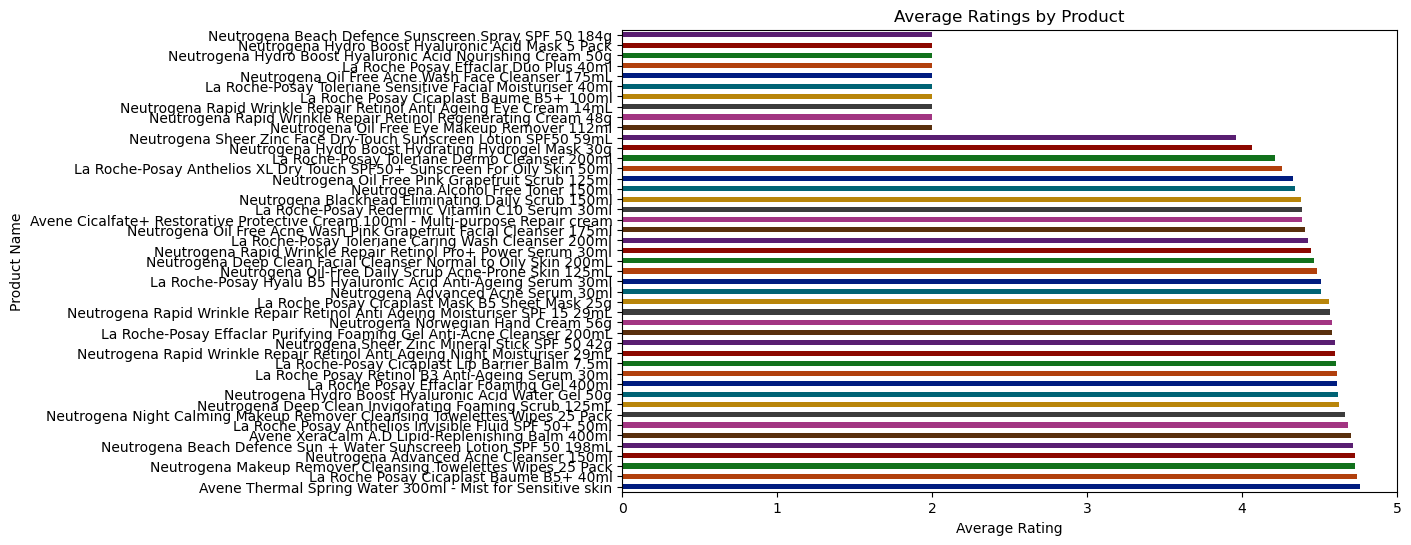

In [36]:

product_ratings = selected_brands_df_curu.groupby('ProductName')['Ratings'].mean().sort_values(ascending=False)

# Defining a different dark color palette 

dark_colors = sns.color_palette("dark", len(product_ratings))


plt.figure(figsize=(10, 6))

# Seting the bar color to the different dark color palette
product_ratings.plot(kind='barh', color=dark_colors)

plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Average Ratings by Product')

plt.show()  # Displaying the plot

The above graph shows us the average rating for the products in the dataset. As observed in this graph there is no particular products brand which have the best ratings- all of the ratings are mixed and hence, creates a well divided dataset for modelling. There are no biases towards a particular brand. 

### Graph 2

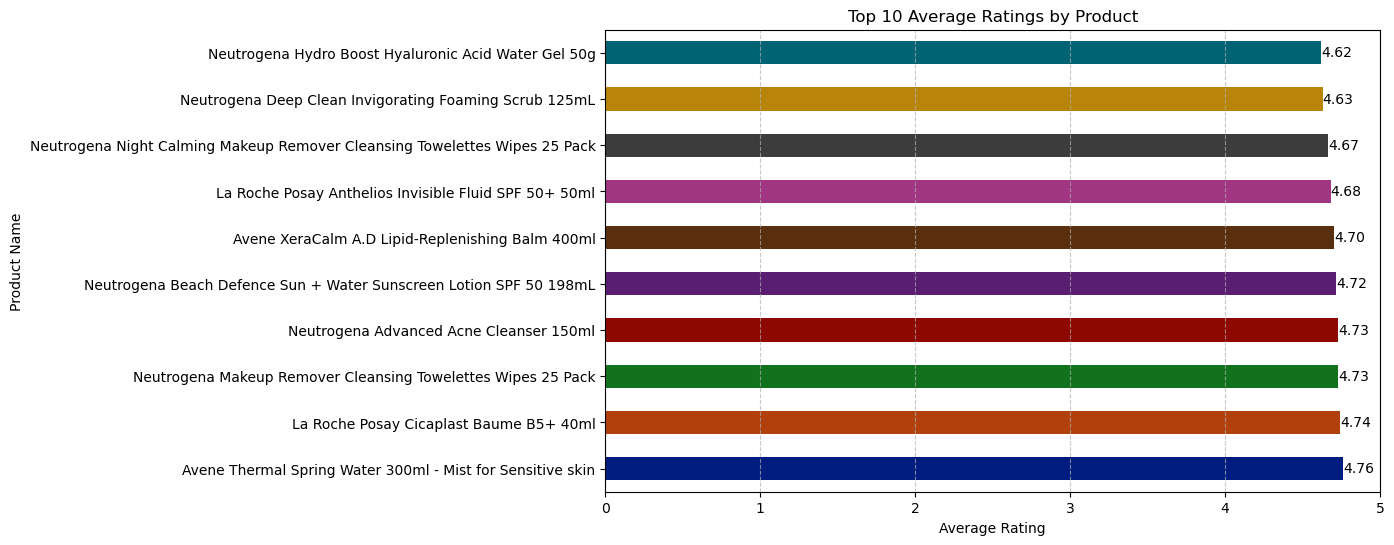

In [37]:
# Limiting the number of displayed bars (e.g., top 10 products)
top_n = 10
product_ratings = product_ratings.head(top_n)

plt.figure(figsize=(10, 6))

# Setting the bar color to the darker color palette
ax = product_ratings.plot(kind='barh', color=dark_colors)

plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Top {} Average Ratings by Product'.format(top_n))

# Customising bar labels 
for i, rating in enumerate(product_ratings):
    ax.text(rating, i, f'{rating:.2f}', va='center')  # Displaying ratings on the right

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding horizontal grid lines

plt.show()  # Displaying the plot

In the graph plotted above, it is showing us the top 10 average ratings by product in the whole dataset. As observed "Neutrogena" products on an average have the best ratings comparatively to the other two brands.

### Graph 3

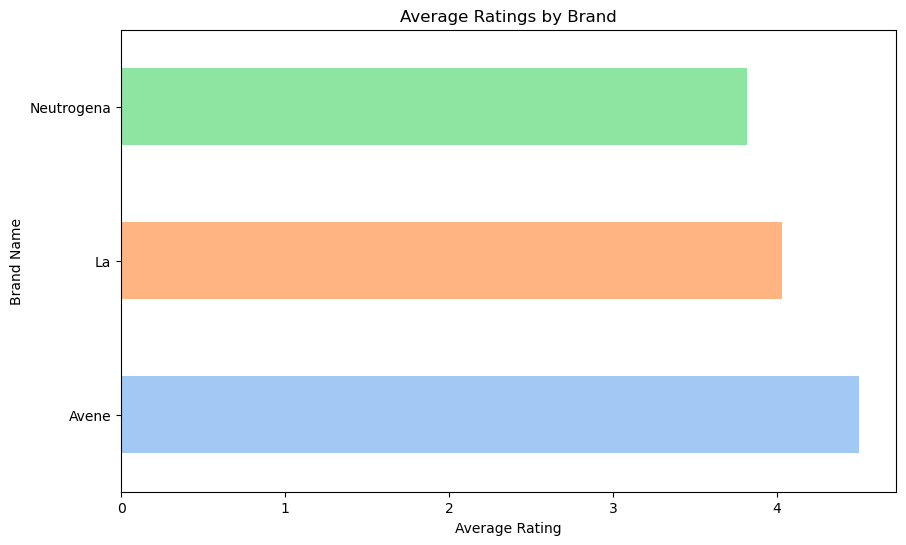

In [38]:
product_ratings = selected_brands_df_curu.groupby('brand_name')['Ratings'].mean().sort_values(ascending=False)

# Defining a pastel color palette 
pastel_colors = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))

# Setting the bar color to the pastel color palette
product_ratings.plot(kind='barh', color=pastel_colors)

plt.xlabel('Average Rating')
plt.ylabel('Brand Name')
plt.title('Average Ratings by Brand')

plt.show()  

In the above graph, we have plotted the average ratings for each brand to understand which brand has the highest ratings- as noticed "Avene" has the highest ratings for their products and then comes "La roche posay" and lastly, "Neutrogena".

### Graph 4

Verifying the content of selected_brands_df_curu dataset to ensure that it contains multiple products for each brand.

In [39]:
product_counts = selected_brands_df_curu.groupby("brand_name")["ProductName"].nunique()
print(product_counts)

brand_name
Avene          3
La            15
Neutrogena    27
Name: ProductName, dtype: int64


checking for duplicates and removing them to avoid selecting the same product multiple times

In [40]:
selected_brands_df_curu = selected_brands_df_curu.drop_duplicates(subset=["ProductName", "brand_name"])


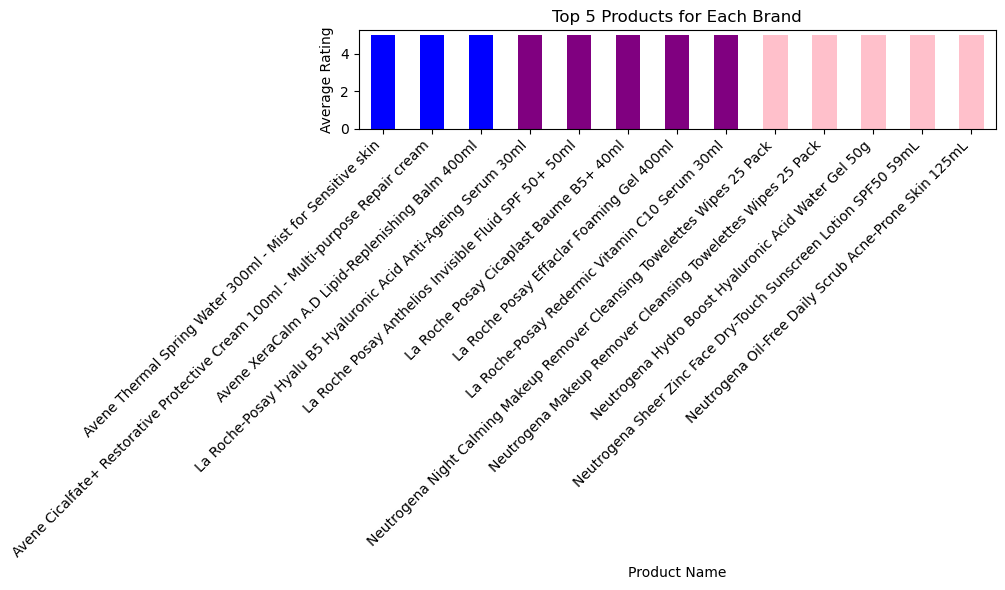

In [41]:
# Group by brand, calculate the mean rating, and select the top 5 products
top_products = selected_brands_df_curu.groupby("brand_name").apply(lambda x: x.nlargest(5, "Ratings"))

# Reset the index and drop the hierarchical index
top_products = top_products.reset_index(drop=True)

# Create a bar plot for the top products with specific brand colors
brand_colors = {
    "La": "purple",
    "Avene": "blue",
    "Neutrogena": "pink",
}

# Create a custom color list based on the brand column
colors = top_products["brand_name"].map(brand_colors)

fig, ax = plt.subplots(figsize=(10, 6))
top_products.plot(kind="bar", y="Ratings", color=colors, ax=ax, legend=False)  # Remove the legend

plt.title("Top 5 Products for Each Brand")
plt.xlabel("Product Name")
plt.ylabel("Average Rating")
plt.xticks(range(len(top_products)), top_products["ProductName"], rotation=45, ha="right")

plt.tight_layout()
plt.show()



In the above graph, we have plotted the top 5 products for each brand to understand the top products in each brand.